In [1]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from k_means import kMeans
from k_centers import kCenters
from single_swap import singleSwap
from spectral_clustering import spectralClustering
from EM import EM

%matplotlib inline

In [2]:
# read the data
clustering = pd.read_csv('./data/clustering.csv', header=None).values
bigClustering = pd.read_csv('./data/bigClusteringData.csv', header=None).values

# define colors
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', '#7FFFD4', '#9ACD32', '#FFA500']

# I. K-Means Algorithm

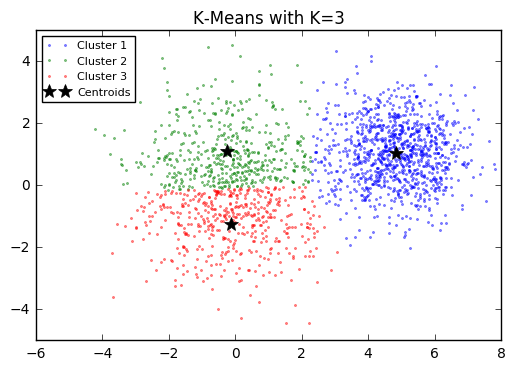

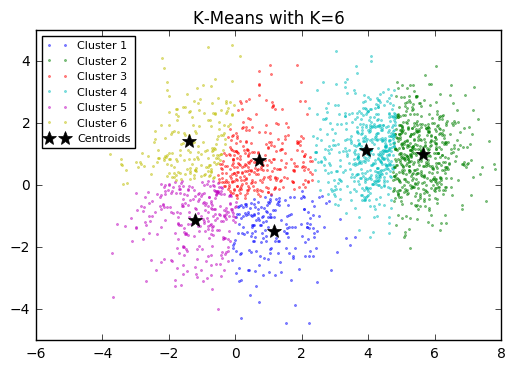

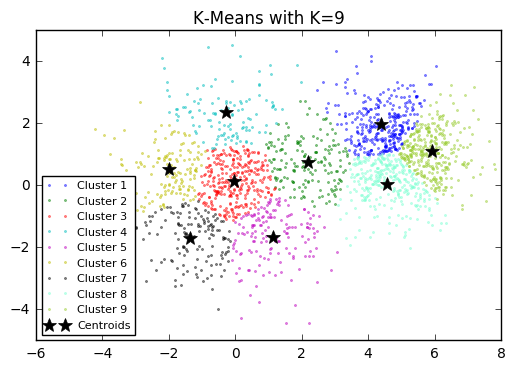

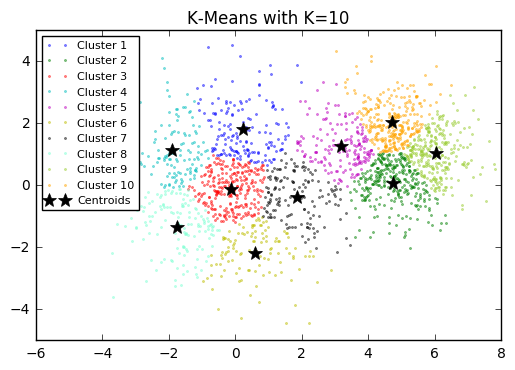

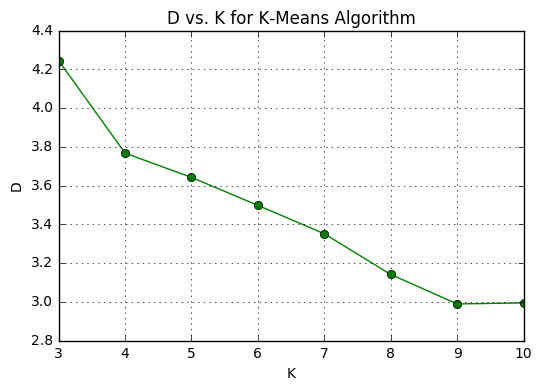

D	 [4.2446660070158311, 3.7671116258843473, 3.6417412559391327, 3.497492193522838, 3.3509150468954485, 3.1408027056560579, 2.9886749101177155, 2.9941056551712397]


In [3]:
# ------------------------------------------------------------------------
# clustering.txt
# ------------------------------------------------------------------------
loss = []
index = []
iteration = 50
tol = 1e-5
X = clustering

for K in [3, 4, 5, 6, 7, 8, 9, 10]:
    best_D = None
    best_C = None
    best_Q = None
    for i in range(iteration):
        Q, C, D = kMeans(X, K, tol=tol, random_state=None, verbose=False)
        if best_D is None:
            best_D = D
            best_C = C
            best_Q = Q
        else:
            if D < best_D:
                best_D = D
                best_C = C
                best_Q = Q
    
    loss.append(best_D)
    index.append(best_C)
    
    # plot the clustered data
    fig, ax = plt.subplots()
    for i in range(K):
        tmp = X[best_C==i, :]
        ax.plot(tmp[:, 0], tmp[:, 1], '.', color=colors[i], 
                alpha=0.5, markersize=3, label='Cluster ' + str(i+1))
    ax.plot(best_Q[:, 0], best_Q[:, 1], '*', color='k', markersize=10, label='Centroids')
    ax.set_title('K-Means with K=' + str(K))
    ax.legend(fontsize=8, loc='best')
    fig.savefig('./result/pdf/clustering_kMeans_' + str(K) + '.pdf')
    fig.savefig('./result/clustering_kMeans_' + str(K) + '.png', dpi=300)
    plt.show()

# ------------------------------------------------------------------------
# plot the change of D versus K
# ------------------------------------------------------------------------
fig, ax = plt.subplots()
ax.plot(range(3, 11), loss, 'go-')
ax.set_title('D vs. K for K-Means Algorithm')
ax.set_xlabel('K')
ax.set_ylabel('D')
ax.grid('on')
fig.savefig('./result/pdf/loss_clustering_kMeans.pdf')
fig.savefig('./result/loss_clustering_kMeans.png', dpi=300)
plt.show()
print('D\t', loss)

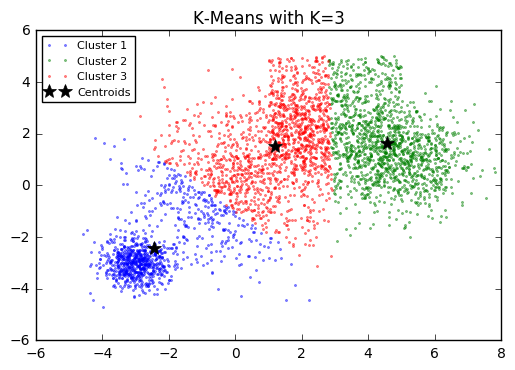

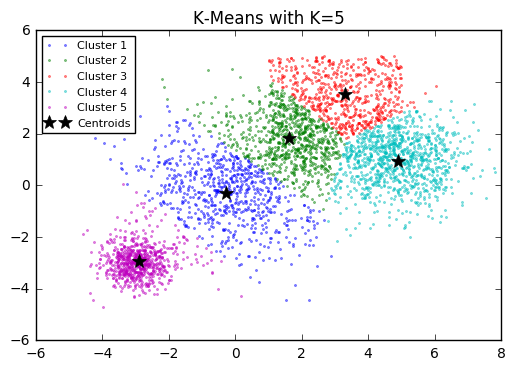

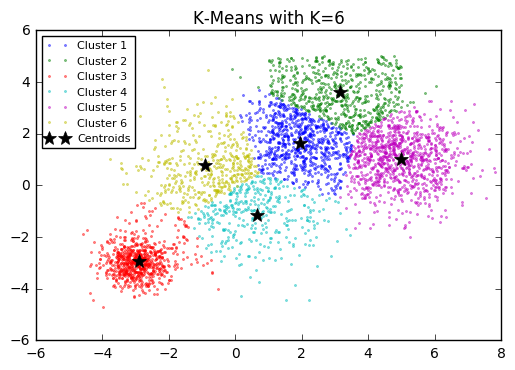

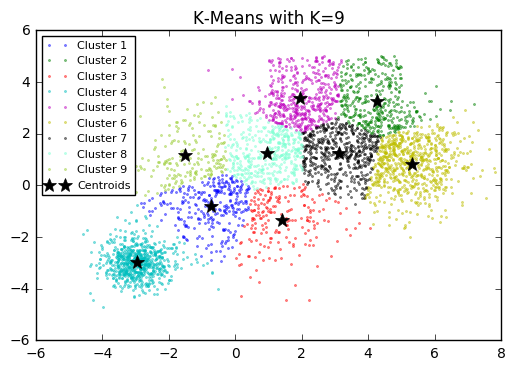

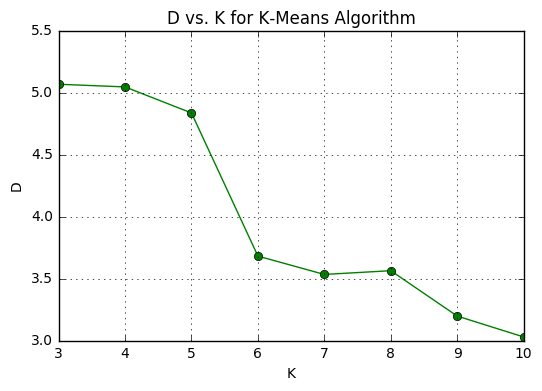

D	 [5.0665142208144074, 5.0450674354935439, 4.8349307559875969, 3.6807098140033774, 3.5327408839395207, 3.5628975554584086, 3.1970998019704657, 3.0286448137330173]


In [4]:
# ------------------------------------------------------------------------
# bigClustering.txt
# ------------------------------------------------------------------------
loss = []
index = []
iteration = 50
tol = 1e-5
X = bigClustering

for K in [3, 4, 5, 6, 7, 8, 9, 10]:
    best_D = None
    best_C = None
    best_Q = None
    for i in range(iteration):
        Q, C, D = kMeans(X, K, tol=tol, random_state=None, verbose=False)
        if best_D is None:
            best_D = D
            best_C = C
            best_Q = Q
        else:
            if D < best_D:
                best_D = D
                best_C = C
                best_Q = Q
    
    loss.append(best_D)
    index.append(best_C)
    
    # plot the clustered data
    fig, ax = plt.subplots()
    for i in range(K):
        tmp = X[best_C==i, :]
        ax.plot(tmp[:, 0], tmp[:, 1], '.', color=colors[i], 
                alpha=0.5, markersize=3, label='Cluster ' + str(i+1))
    ax.plot(best_Q[:, 0], best_Q[:, 1], '*', color='k', markersize=10, label='Centroids')
    ax.set_title('K-Means with K=' + str(K))
    ax.legend(fontsize=8, loc='best')
    fig.savefig('./result/pdf/bigClustering_kMeans_' + str(K) + '.pdf')
    fig.savefig('./result/bigClustering_kMeans_' + str(K) + '.png', dpi=300)
    plt.show()

# ------------------------------------------------------------------------
# plot the change of D versus K
# ------------------------------------------------------------------------
fig, ax = plt.subplots()
ax.plot(range(3, 11), loss, 'go-')
ax.set_title('D vs. K for K-Means Algorithm')
ax.set_xlabel('K')
ax.set_ylabel('D')
ax.grid('on')
fig.savefig('./result/pdf/loss_bigClustering_kMeans.pdf')
fig.savefig('./result/loss_bigClustering_kMeans.png', dpi=300)
plt.show()
print('D\t', loss)

# II. Greedy K-Centers Algorithm

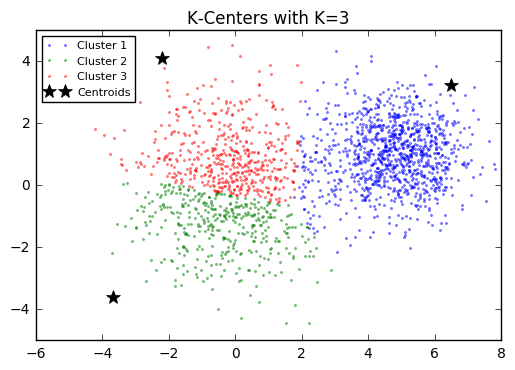

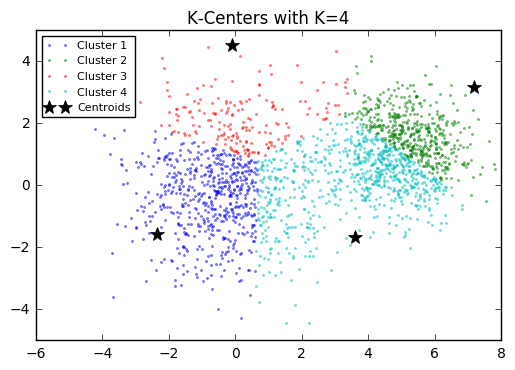

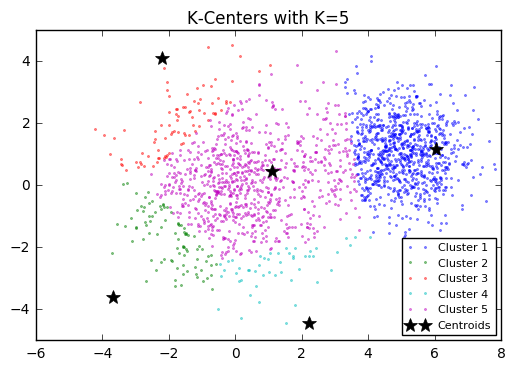

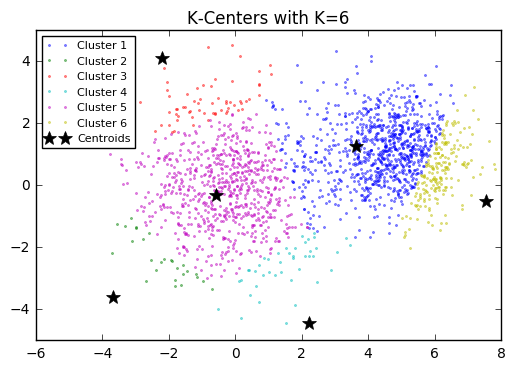

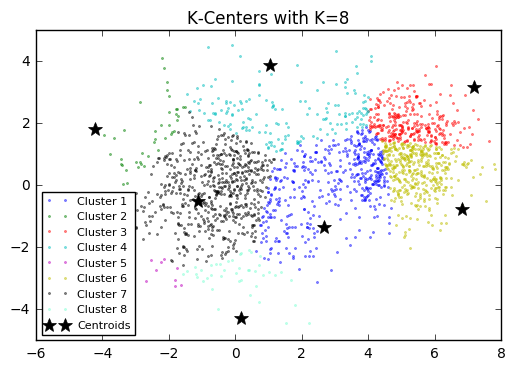

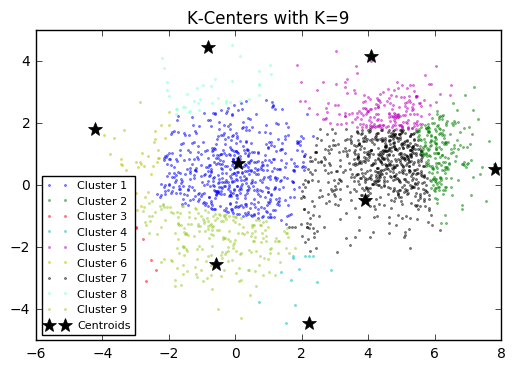

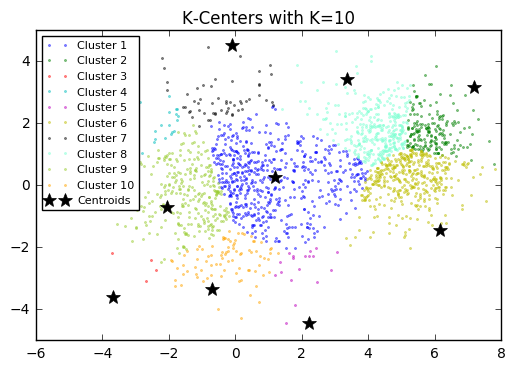

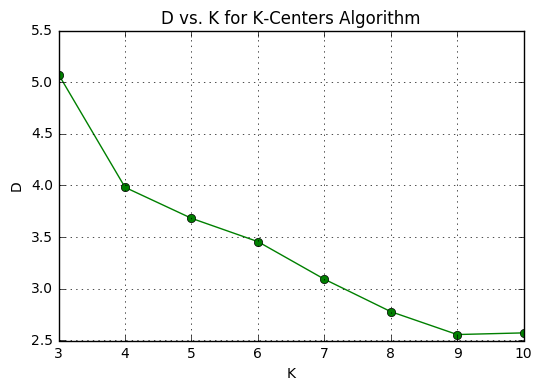

D	 [5.0739830754546276, 3.9820803633276922, 3.6825658514139294, 3.4568375489744954, 3.093567998282889, 2.7794335106276602, 2.5576518390899103, 2.5737009324317386]


In [5]:
# ------------------------------------------------------------------------
# clustering.txt
# ------------------------------------------------------------------------
loss = []
index = []
iteration = 50
X = clustering

for K in [3, 4, 5, 6, 7, 8, 9, 10]:
    best_D = None
    best_C = None
    best_Q = None
    for i in range(iteration):
        Q, C, D, _ = kCenters(X, K, random_state=None, verbose=False)
        if best_D is None:
            best_D = D
            best_C = C
            best_Q = Q
        else:
            if D < best_D:
                best_D = D
                best_C = C
                best_Q = Q
    
    loss.append(best_D)
    index.append(best_C)
    
    # plot the clustered data
    fig, ax = plt.subplots()
    for i in range(K):
        tmp = X[C==i, :]
        ax.plot(tmp[:, 0], tmp[:, 1], '.', color=colors[i], 
                alpha=0.5, markersize=3, label='Cluster ' + str(i+1))
    ax.plot(Q[:, 0], Q[:, 1], '*', color='k', markersize=10, label='Centroids')
    ax.set_title('K-Centers with K=' + str(K))
    ax.legend(fontsize=8, loc='best')
    fig.savefig('./result/pdf/clustering_kCenter_' + str(K) + '.pdf')
    fig.savefig('./result/clustering_kCenter_' + str(K) + '.png', dpi=300)
    plt.show()

# ------------------------------------------------------------------------
# plot the change of D versus K
# ------------------------------------------------------------------------
fig, ax = plt.subplots()
ax.plot(range(3, 11), loss, 'go-')
ax.set_title('D vs. K for K-Centers Algorithm')
ax.set_xlabel('K')
ax.set_ylabel('D')
ax.grid('on')
fig.savefig('./result/pdf/loss_clustering_kCenter.pdf')
fig.savefig('./result/loss_clustering_kCenter.png', dpi=300)
plt.show()
print('D\t', loss)

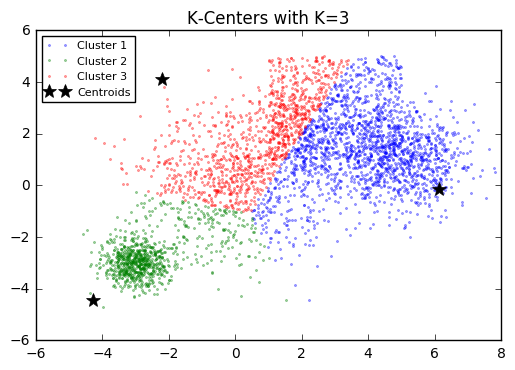

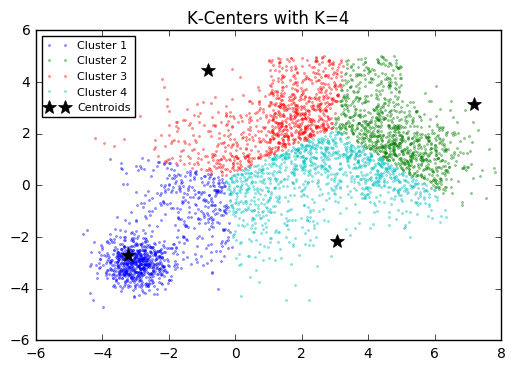

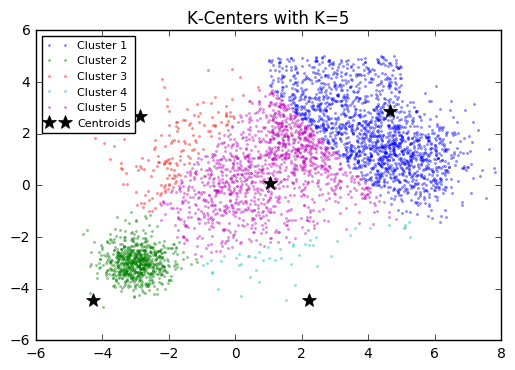

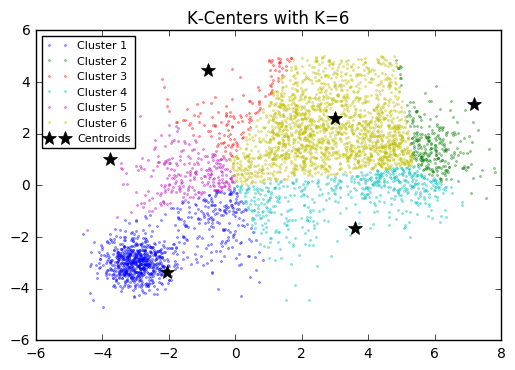

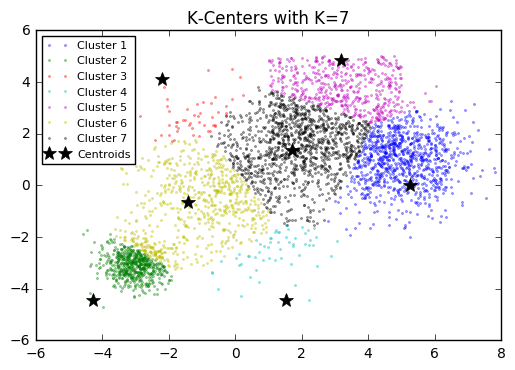

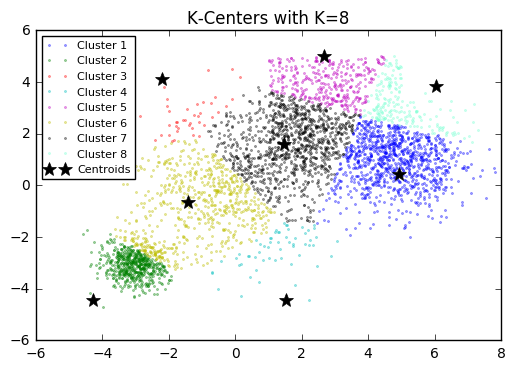

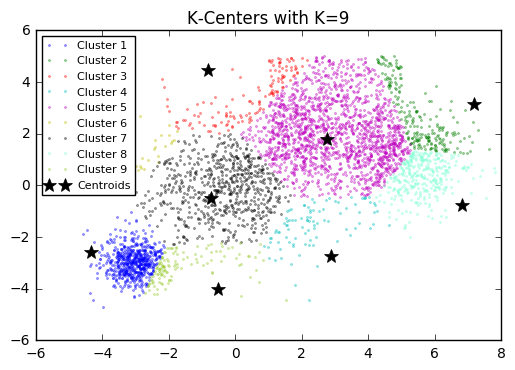

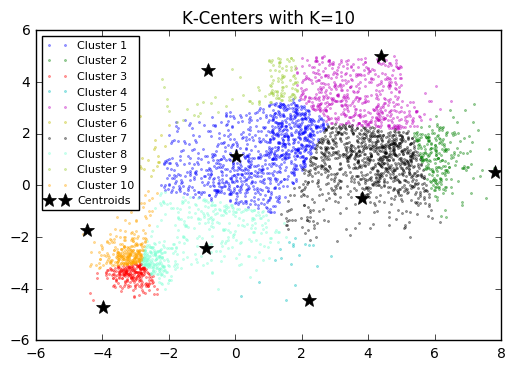

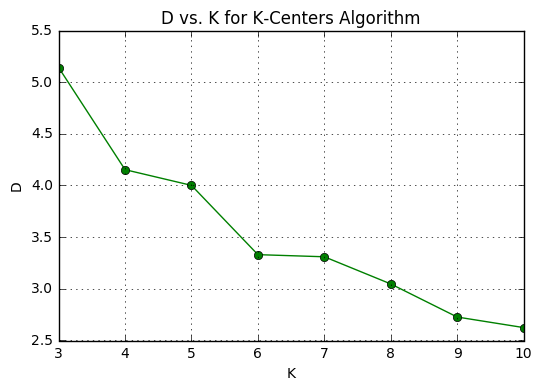

D	 [5.1417549405090286, 4.1532286537102676, 4.0011732516975567, 3.3308404825208906, 3.3102098353578735, 3.0473498683282165, 2.7271875219720405, 2.6249725138370494]


In [6]:
# ------------------------------------------------------------------------
# bigClustering.txt
# ------------------------------------------------------------------------
loss = []
index = []
iteration = 50
tol = 1e-5
X = bigClustering

for K in [3, 4, 5, 6, 7, 8, 9, 10]:
    best_D = None
    best_C = None
    best_Q = None
    for i in range(iteration):
        Q, C, D, _ = kCenters(X, K, random_state=None, verbose=False)
        if best_D is None:
            best_D = D
            best_C = C
            best_Q = Q
        else:
            if D < best_D:
                best_D = D
                best_C = C
                best_Q = Q
    
    loss.append(best_D)
    index.append(best_C)
    
    # plot the clustered data
    fig, ax = plt.subplots()
    for i in range(K):
        tmp = X[C==i, :]
        ax.plot(tmp[:, 0], tmp[:, 1], '.', color=colors[i], 
                alpha=0.4, markersize=3, label='Cluster ' + str(i+1))
    ax.plot(Q[:, 0], Q[:, 1], '*', color='k', markersize=10, label='Centroids')
    ax.set_title('K-Centers with K=' + str(K))
    ax.legend(fontsize=8, loc='best')
    fig.savefig('./result/pdf/bigClustering_kCenter_' + str(K) + '.pdf')
    fig.savefig('./result/bigClustering_kCenter_' + str(K) + '.png', dpi=300)
    plt.show()

# ------------------------------------------------------------------------
# plot the change of D versus K
# ------------------------------------------------------------------------
fig, ax = plt.subplots()
ax.plot(range(3, 11), loss, 'go-')
ax.set_title('D vs. K for K-Centers Algorithm')
ax.set_xlabel('K')
ax.set_ylabel('D')
ax.grid('on')
fig.savefig('./result/pdf/loss_bigClustering_kCenter.pdf')
fig.savefig('./result/loss_bigClustering_kCenter.png', dpi=300)
plt.show()
print('D\t', loss)

# III. Single-Swap Algorithm

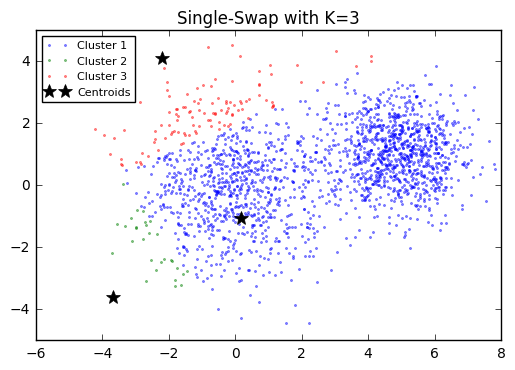

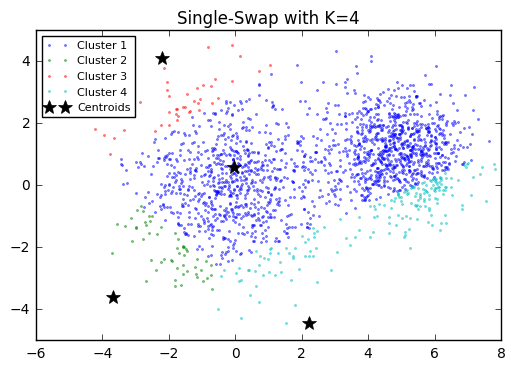

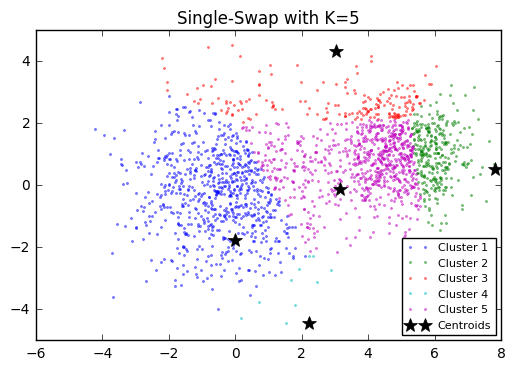

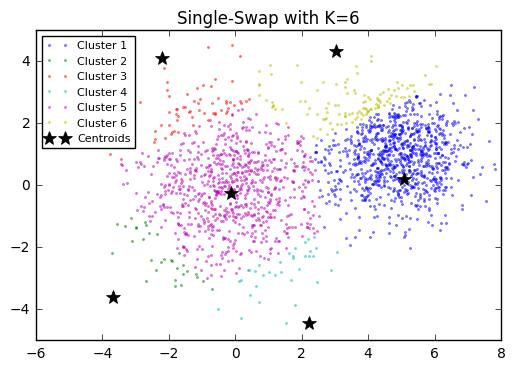

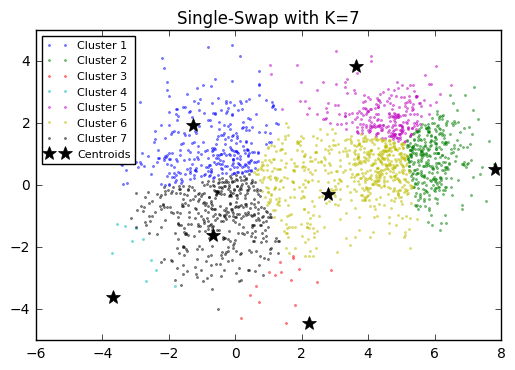

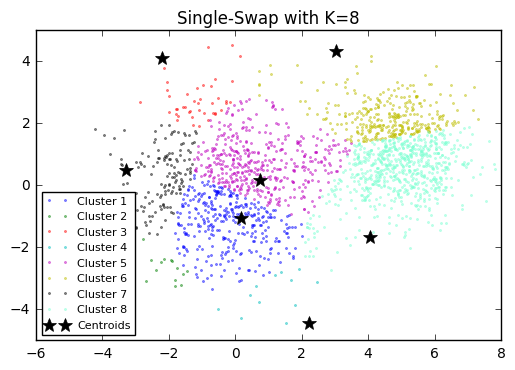

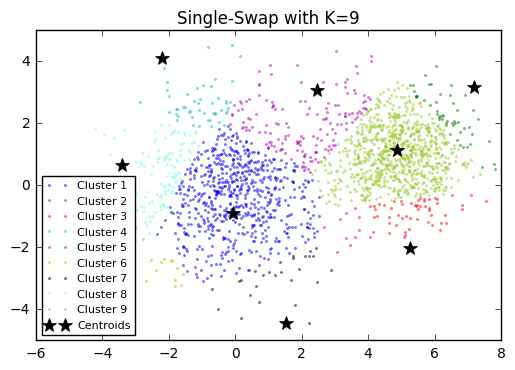

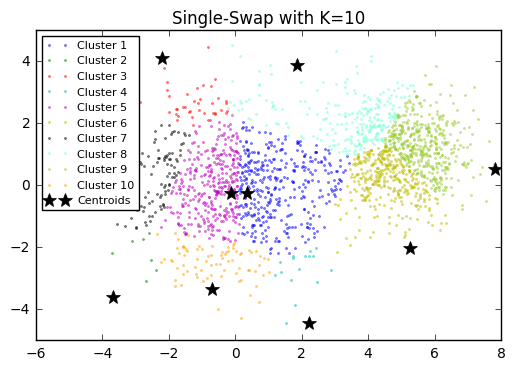

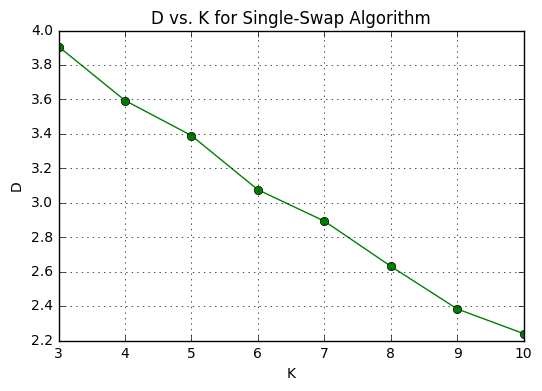

D	 [3.9062796086456735, 3.5935077382551999, 3.3899270272381967, 3.0751466916067596, 2.8933625355976393, 2.6312216189633282, 2.3833148701755715, 2.2399722797615151]


In [7]:
# ------------------------------------------------------------------------
# clustering.txt
# ------------------------------------------------------------------------
loss = []
index = []
iteration = 50
tau = 0.05
X = clustering

for K in [3, 4, 5, 6, 7, 8, 9, 10]:
    best_D = None
    best_C = None
    best_Q = None
    for i in range(iteration):
        Q, C, D = singleSwap(X, K, tau=tau, random_state=None, verbose=False)
        if best_D is None:
            best_D = D
            best_C = C
            best_Q = Q
        else:
            if D < best_D:
                best_D = D
                best_C = C
                best_Q = Q
    
    loss.append(best_D)
    index.append(best_C)
    
    # plot the clustered data
    fig, ax = plt.subplots()
    for i in range(K):
        tmp = X[C==i, :]
        ax.plot(tmp[:, 0], tmp[:, 1], '.', color=colors[i], 
                alpha=0.5, markersize=3, label='Cluster ' + str(i+1))
    ax.plot(Q[:, 0], Q[:, 1], '*', color='k', markersize=10, label='Centroids')
    ax.set_title('Single-Swap with K=' + str(K))
    ax.legend(fontsize=8, loc='best')
    fig.savefig('./result/pdf/clustering_singleSwap_' + str(K) + '.pdf')
    fig.savefig('./result/clustering_singleSwap_' + str(K) + '.png', dpi=300)
    plt.show()

# ------------------------------------------------------------------------
# plot the change of D versus K
# ------------------------------------------------------------------------
fig, ax = plt.subplots()
ax.plot(range(3, 11), loss, 'go-')
ax.set_title('D vs. K for Single-Swap Algorithm')
ax.set_xlabel('K')
ax.set_ylabel('D')
ax.grid('on')
fig.savefig('./result/pdf/loss_clustering_singleSwap.pdf')
fig.savefig('./result/loss_clustering_singleSwap.png', dpi=300)
plt.show()
print('D\t', loss)

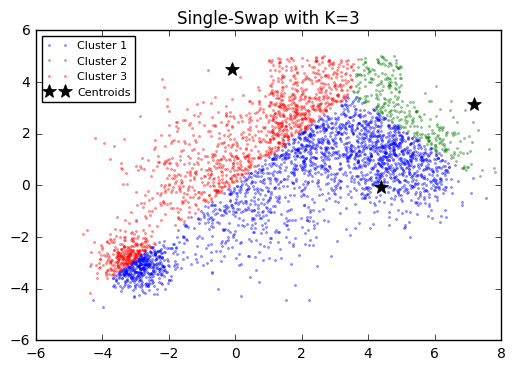

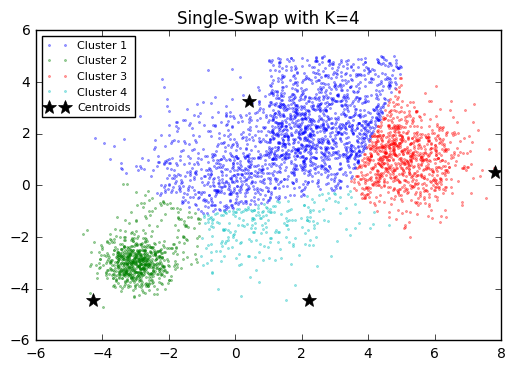

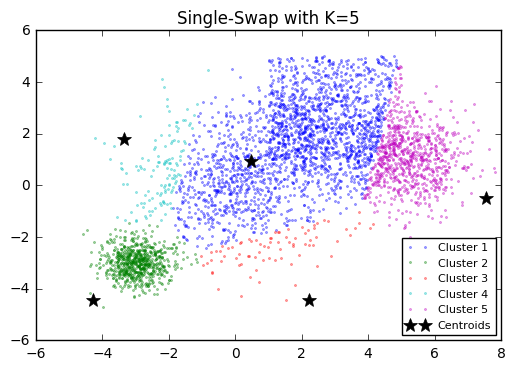

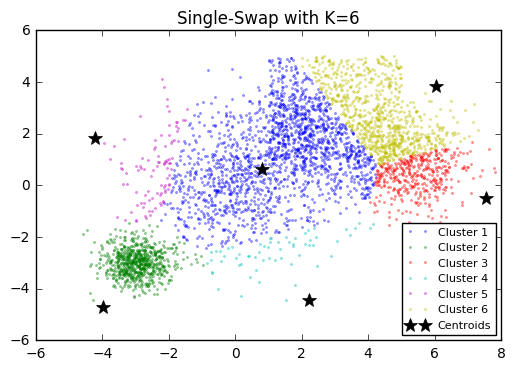

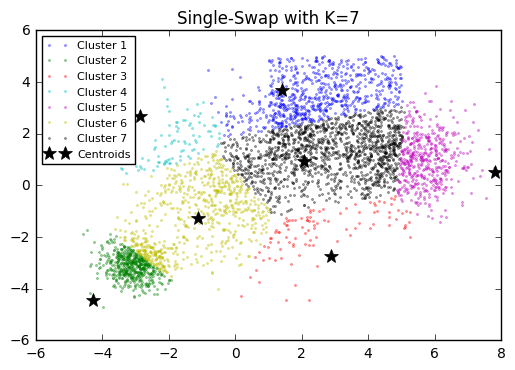

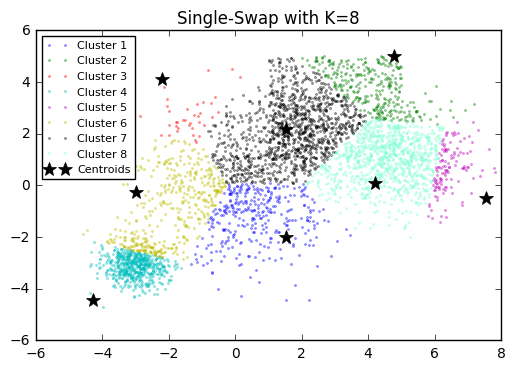

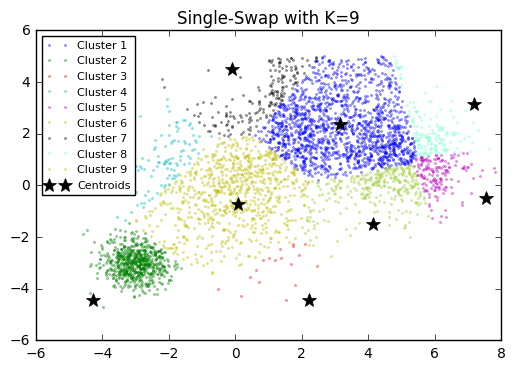

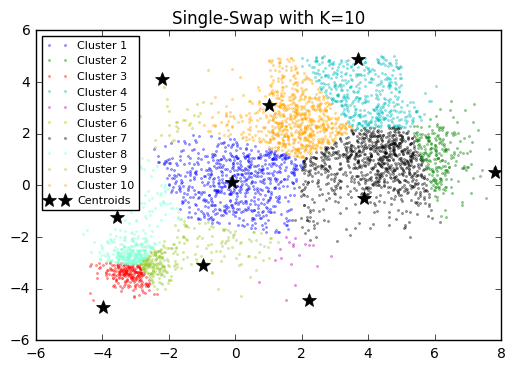

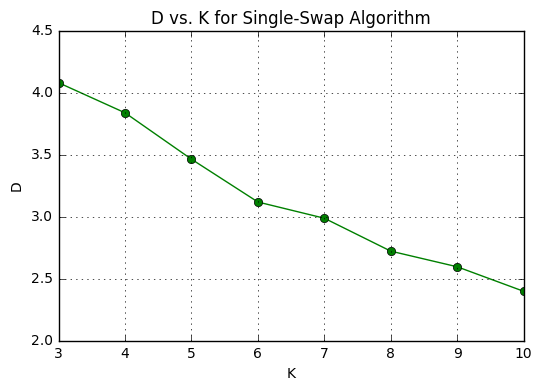

D	 [4.0786546262217405, 3.8362361814674548, 3.4619950852073718, 3.1168998415893956, 2.9859668467683966, 2.7206507251207386, 2.5945441931098423, 2.3968955338103495]


In [8]:
# ------------------------------------------------------------------------
# bigClustering.txt
# ------------------------------------------------------------------------
loss = []
index = []
iteration = 50
tau = 0.05
X = bigClustering

for K in [3, 4, 5, 6, 7, 8, 9, 10]:
    best_D = None
    best_C = None
    best_Q = None
    for i in range(iteration):
        Q, C, D = singleSwap(X, K, tau=tau, random_state=None, verbose=False)
        if best_D is None:
            best_D = D
            best_C = C
            best_Q = Q
        else:
            if D < best_D:
                best_D = D
                best_C = C
                best_Q = Q
    
    loss.append(best_D)
    index.append(best_C)
    
    # plot the clustered data
    fig, ax = plt.subplots()
    for i in range(K):
        tmp = X[C==i, :]
        ax.plot(tmp[:, 0], tmp[:, 1], '.', color=colors[i], 
                alpha=0.4, markersize=3, label='Cluster ' + str(i+1))
    ax.plot(Q[:, 0], Q[:, 1], '*', color='k', markersize=10, label='Centroids')
    ax.set_title('Single-Swap with K=' + str(K))
    ax.legend(fontsize=8, loc='best')
    fig.savefig('./result/pdf/bigClustering_singleSwap_' + str(K) + '.pdf')
    fig.savefig('./result/bigClustering_singleSwap_' + str(K) + '.png', dpi=300)
    plt.show()

# ------------------------------------------------------------------------
# plot the change of D versus K
# ------------------------------------------------------------------------
fig, ax = plt.subplots()
ax.plot(range(3, 11), loss, 'go-')
ax.set_title('D vs. K for Single-Swap Algorithm')
ax.set_xlabel('K')
ax.set_ylabel('D')
ax.grid('on')
fig.savefig('./result/pdf/loss_bigClustering_singleSwap.pdf')
fig.savefig('./result/loss_bigClustering_singleSwap.png', dpi=300)
plt.show()
print('D\t', loss)

# IV. Spectral Clustering Algorithm

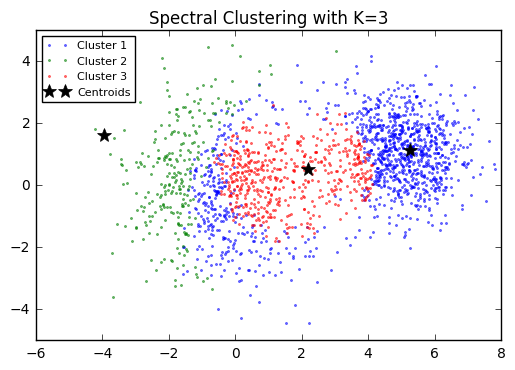

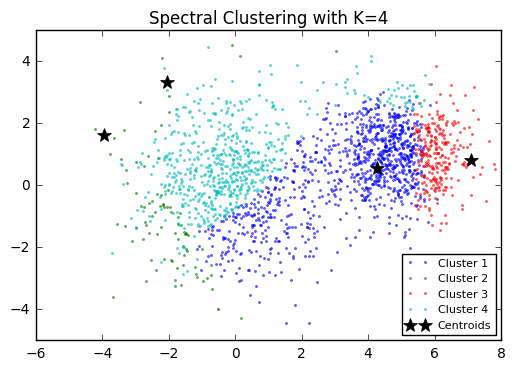

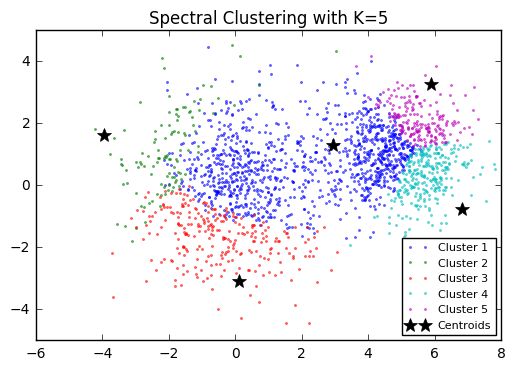

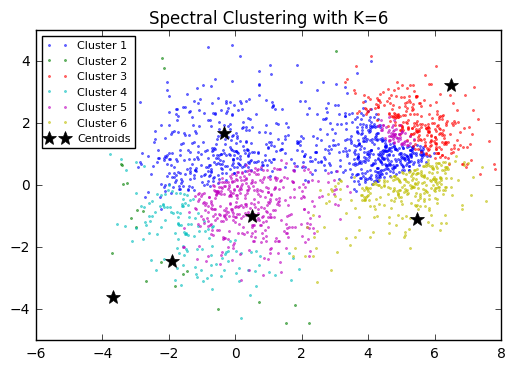

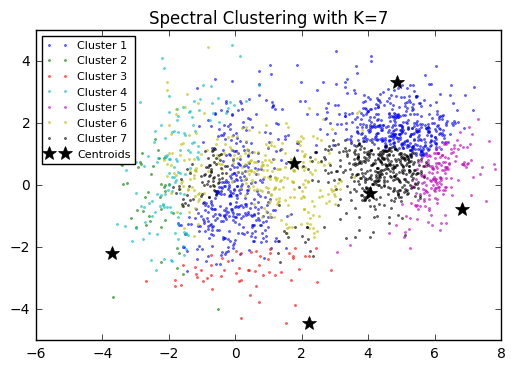

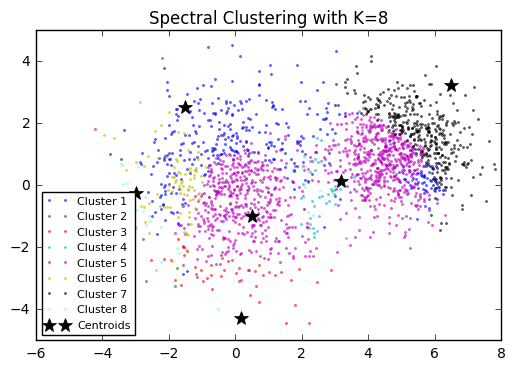

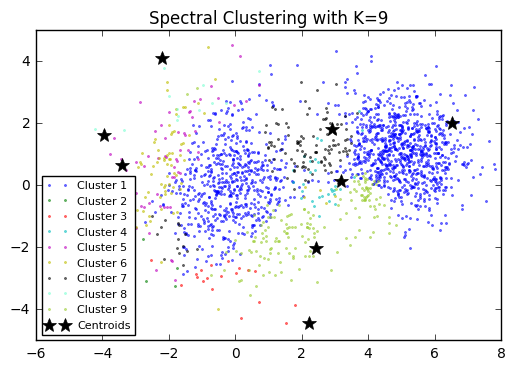

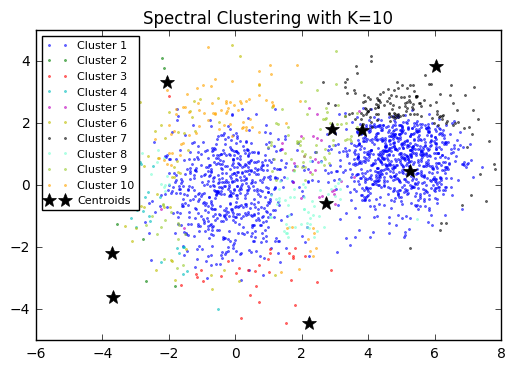

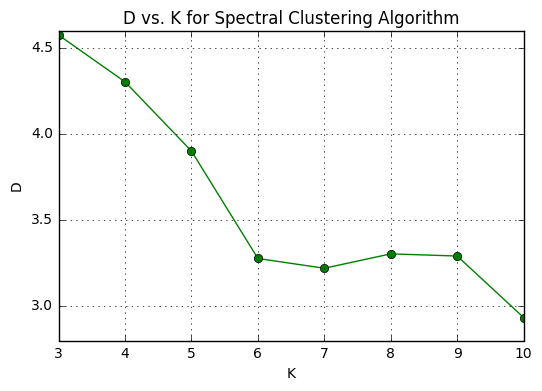

D	 [4.573359913673972, 4.3015590343967158, 3.8996869034449415, 3.2761882336795001, 3.2195522596162345, 3.3030744013418771, 3.2904371437394149, 2.9334039013405571]


In [9]:
# ------------------------------------------------------------------------
# clustering.txt
# ------------------------------------------------------------------------
loss = []
index = []
iteration = 20
X = clustering

for K in [3, 4, 5, 6, 7, 8, 9, 10]:
    best_D = None
    best_C = None
    best_Q = None
    for i in range(iteration):
        W, U, Q, C, D = spectralClustering(X, K, random_state=None, verbose=False)
        if best_D is None:
            best_D = D
            best_C = C
            best_Q = Q
        else:
            if D < best_D:
                best_D = D
                best_C = C
                best_Q = Q
    
    loss.append(best_D)
    index.append(best_C)
    
    # plot the clustered data
    fig, ax = plt.subplots()
    for i in range(K):
        tmp = X[C==i, :]
        ax.plot(tmp[:, 0], tmp[:, 1], '.', color=colors[i], 
                alpha=0.6, markersize=3, label='Cluster ' + str(i+1))
    ax.plot(Q[:, 0], Q[:, 1], '*', color='k', markersize=10, label='Centroids')
    ax.set_title('Spectral Clustering with K=' + str(K))
    ax.legend(fontsize=8, loc='best')
    fig.savefig('./result/pdf/clustering_spectral_' + str(K) + '.pdf')
    fig.savefig('./result/clustering_spectral_' + str(K) + '.png', dpi=300)
    plt.show()

# ------------------------------------------------------------------------
# plot the change of D versus K
# ------------------------------------------------------------------------
fig, ax = plt.subplots()
ax.plot(range(3, 11), loss, 'go-')
ax.set_title('D vs. K for Spectral Clustering Algorithm')
ax.set_xlabel('K')
ax.set_ylabel('D')
ax.grid('on')
fig.savefig('./result/pdf/loss_clustering_spectral.pdf')
fig.savefig('./result/loss_clustering_spectral.png', dpi=300)
plt.show()
print('D\t', loss)

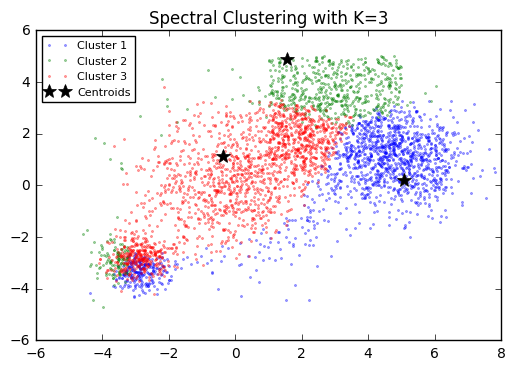

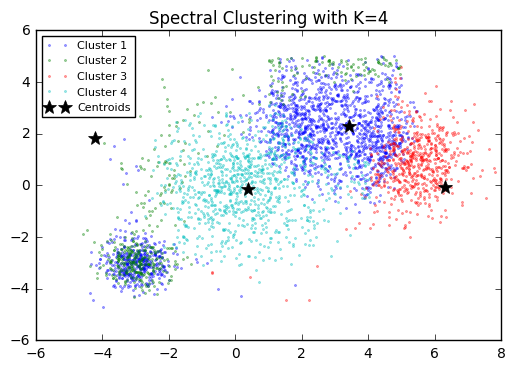

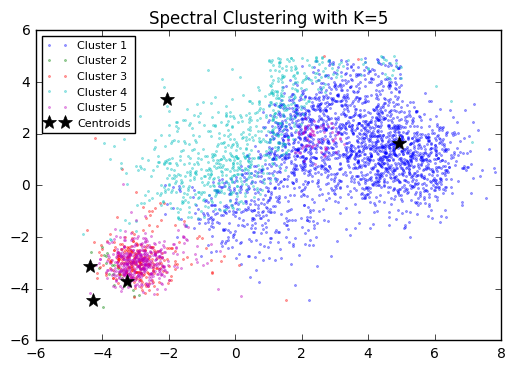

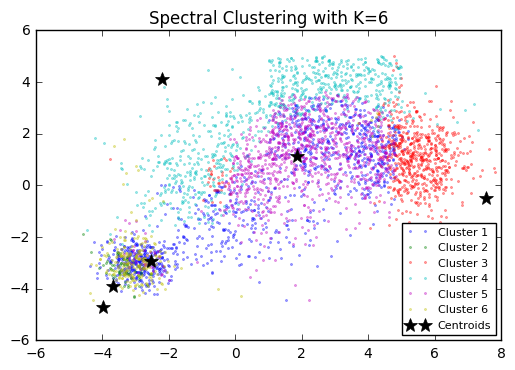

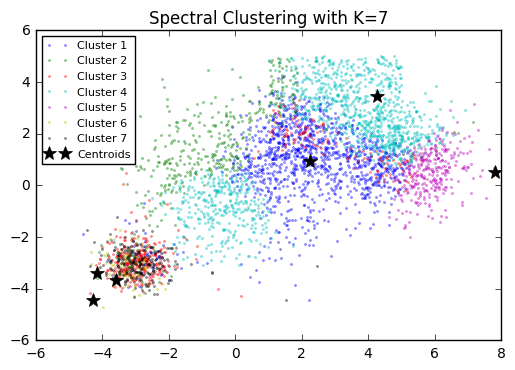

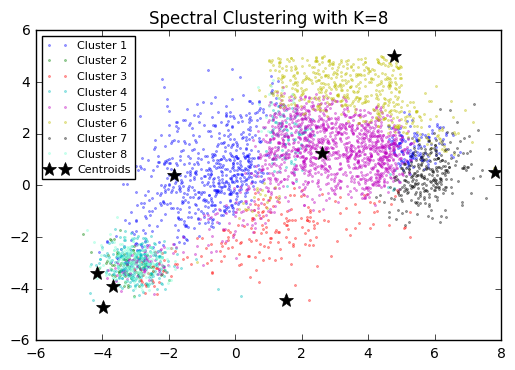

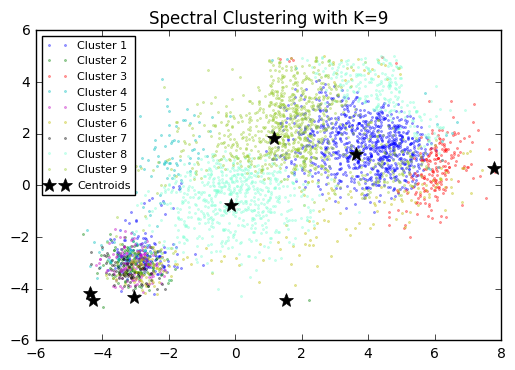

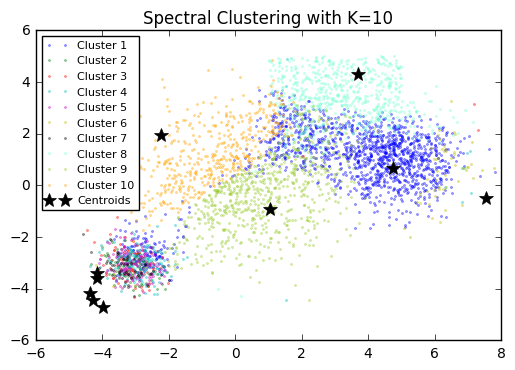

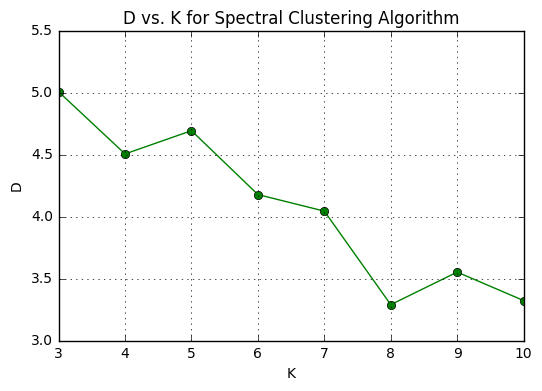

D	 [5.0057867547185833, 4.5046917253015213, 4.6921290594888792, 4.1769270714246378, 4.0432178005271995, 3.2890415701234308, 3.5517021497023089, 3.3219961101121109]


In [10]:
# ------------------------------------------------------------------------
# bigClustering.txt
# ------------------------------------------------------------------------
loss = []
index = []
iteration = 20
tol = 1e-5
X = bigClustering

for K in [3, 4, 5, 6, 7, 8, 9, 10]:
    best_D = None
    best_C = None
    best_Q = None
    for i in range(iteration):
        W, U, Q, C, D = spectralClustering(X, K, random_state=None, verbose=False)
        if best_D is None:
            best_D = D
            best_C = C
            best_Q = Q
        else:
            if D < best_D:
                best_D = D
                best_C = C
                best_Q = Q
    
    loss.append(best_D)
    index.append(best_C)
    
    # plot the clustered data
    fig, ax = plt.subplots()
    for i in range(K):
        tmp = X[C==i, :]
        ax.plot(tmp[:, 0], tmp[:, 1], '.', color=colors[i], 
                alpha=0.4, markersize=3, label='Cluster ' + str(i+1))
    ax.plot(Q[:, 0], Q[:, 1], '*', color='k', markersize=10, label='Centroids')
    ax.set_title('Spectral Clustering with K=' + str(K))
    ax.legend(fontsize=8, loc='best')
    fig.savefig('./result/pdf/bigClustering_spectral_' + str(K) + '.pdf')
    fig.savefig('./result/bigClustering_spectral_' + str(K) + '.png', dpi=300)
    plt.show()

# ------------------------------------------------------------------------
# plot the change of D versus K
# ------------------------------------------------------------------------
fig, ax = plt.subplots()
ax.plot(range(3, 11), loss, 'go-')
ax.set_title('D vs. K for Spectral Clustering Algorithm')
ax.set_xlabel('K')
ax.set_ylabel('D')
ax.grid('on')
fig.savefig('./result/pdf/loss_bigClustering_spectral.pdf')
fig.savefig('./result/loss_bigClustering_spectral.png', dpi=300)
plt.show()
print('D\t', loss)

# V. EM Algorithm

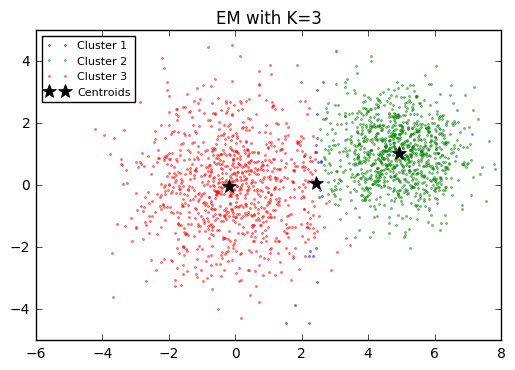

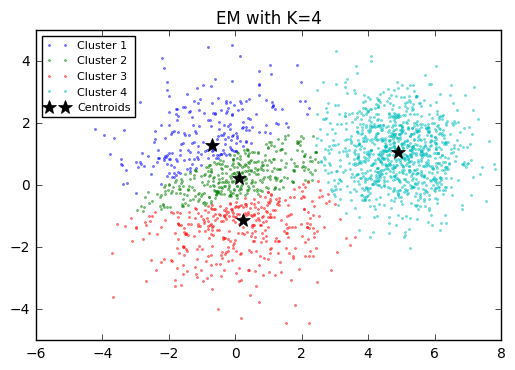

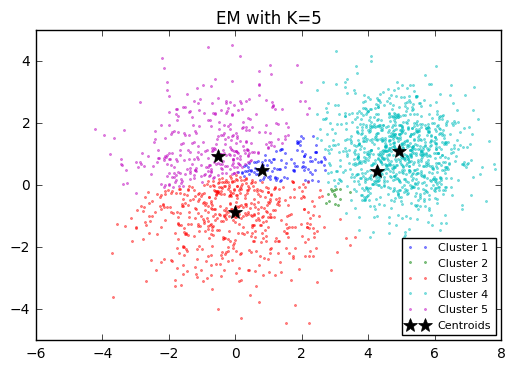

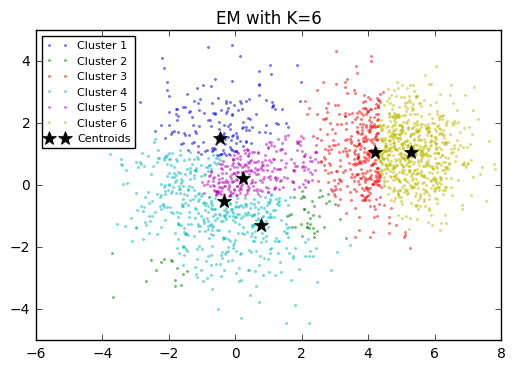

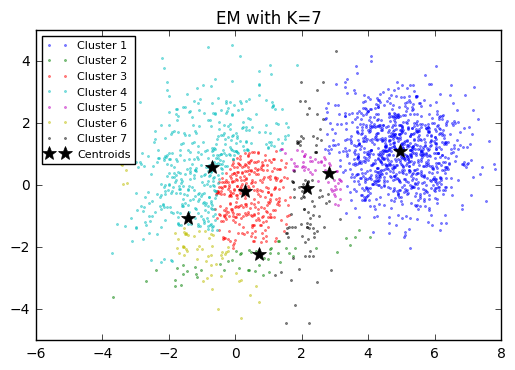

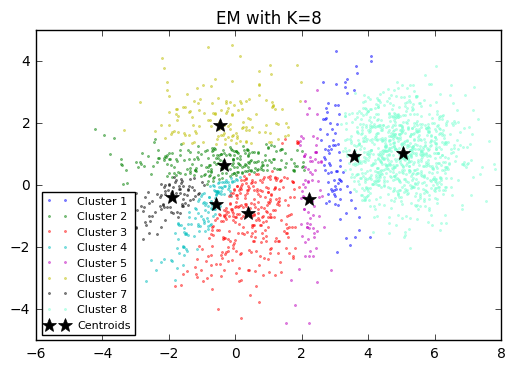

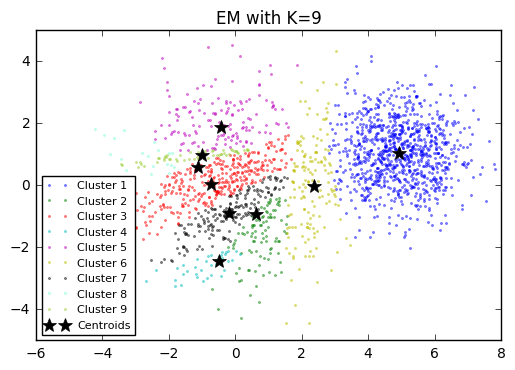

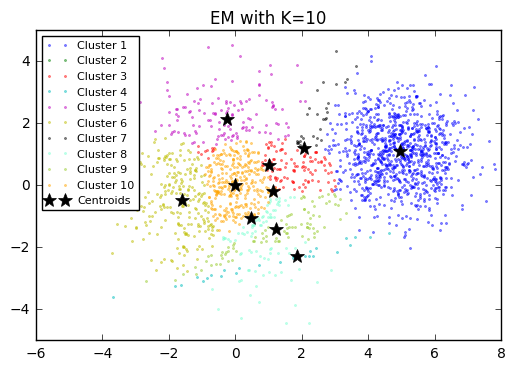

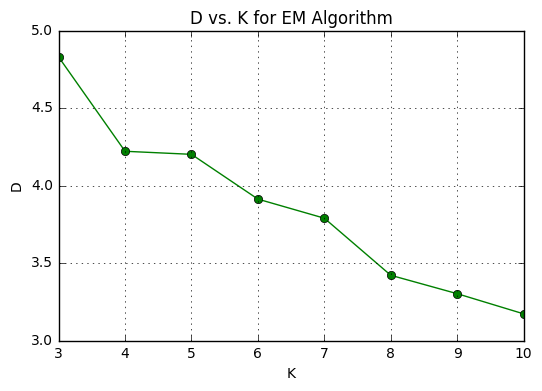

D	 [4.8291010057456534, 4.2208147983531772, 4.2010678571846851, 3.9122019592692219, 3.7890031015834871, 3.4207954835666028, 3.3020330811052441, 3.171940115432466]


In [13]:
# ------------------------------------------------------------------------
# clustering.txt
# ------------------------------------------------------------------------
loss = []
index = []
iteration = 50
threshold = 1e-7
X = clustering

for K in [3, 4, 5, 6, 7, 8, 9, 10]:
    best_D = None
    best_C = None
    best_Q = None
    for i in range(iteration):
        em = EM(m=K, threshold=threshold, random_state=None, maxIter=500)
        em.train(X, verbose=False)  # train the EM model

        # get the label
        C = em.get_label()  # label for each x
        Q = np.array(em.mu)  # cluster centers
        D = em.D

        if best_D is None:
            best_D = D
            best_C = C
            best_Q = Q
        else:
            if D < best_D:
                best_D = D
                best_C = C
                best_Q = Q
    
    loss.append(best_D)
    index.append(best_C)
    
    # plot the clustered data
    fig, ax = plt.subplots()
    for i in range(K):
        tmp = X[C==i, :]
        ax.plot(tmp[:, 0], tmp[:, 1], '.', color=colors[i], 
                alpha=0.5, markersize=3, label='Cluster ' + str(i+1))
    ax.plot(Q[:, 0], Q[:, 1], '*', color='k', markersize=10, label='Centroids')
    ax.set_title('EM with K=' + str(K))
    ax.legend(fontsize=8, loc='best')
    fig.savefig('./result/pdf/clustering_EM_' + str(K) + '.pdf')
    fig.savefig('./result/clustering_EM_' + str(K) + '.png', dpi=300)
    plt.show()

# ------------------------------------------------------------------------
# plot the change of D versus K
# ------------------------------------------------------------------------
fig, ax = plt.subplots()
ax.plot(range(3, 11), loss, 'go-')
ax.set_title('D vs. K for EM Algorithm')
ax.set_xlabel('K')
ax.set_ylabel('D')
ax.grid('on')
fig.savefig('./result/pdf/loss_clustering_EM.pdf')
fig.savefig('./result/loss_clustering_EM.png', dpi=300)
plt.show()
print('D\t', loss)

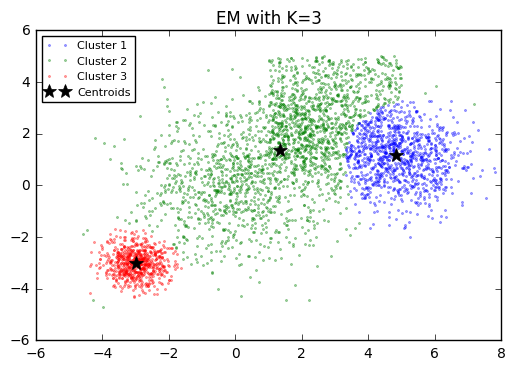

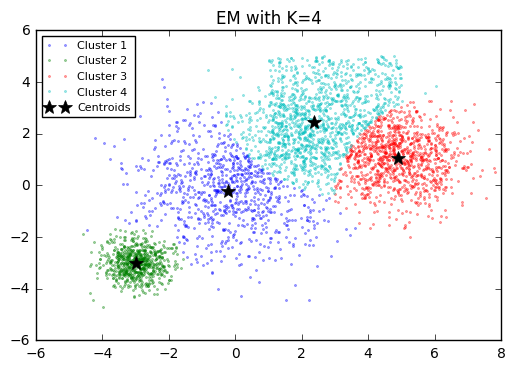

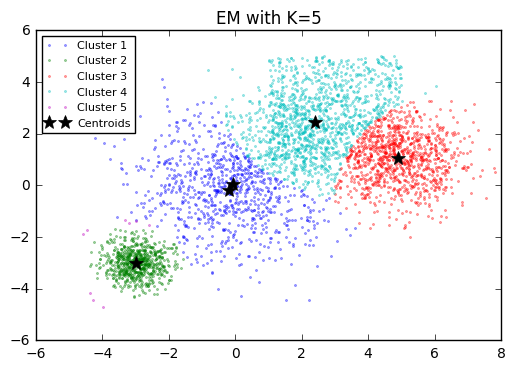

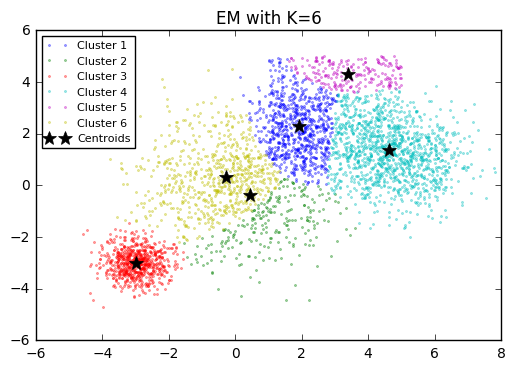

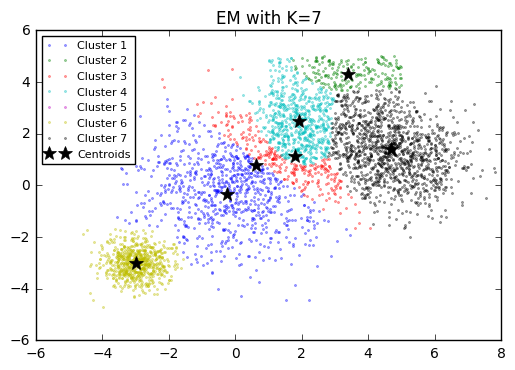

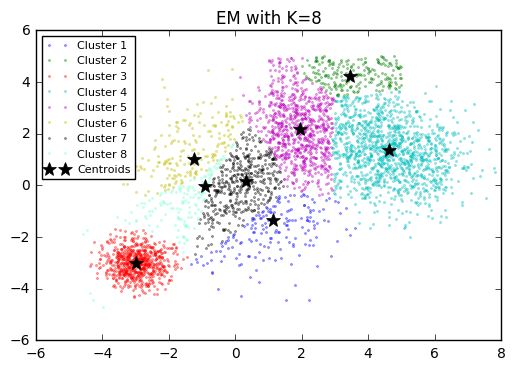

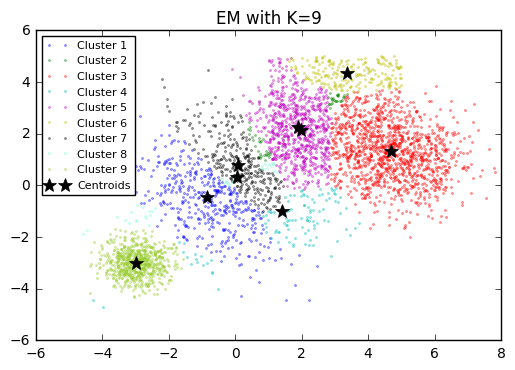

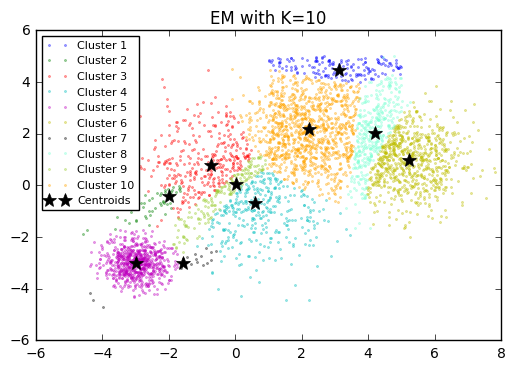

D	 [5.4053275432024979, 4.8813517265119666, 4.5746343868027477, 3.9762084476256829, 3.7020833669195543, 3.4726017042822837, 3.4734706628589826, 3.472601347454968]


In [12]:
# ------------------------------------------------------------------------
# bigClustering.txt
# ------------------------------------------------------------------------
loss = []
index = []
iteration = 50
threshold = 1e-7
X = bigClustering

for K in [3, 4, 5, 6, 7, 8, 9, 10]:
    best_D = None
    best_C = None
    best_Q = None
    for i in range(iteration):
        em = EM(m=K, threshold=threshold, random_state=None, maxIter=500)
        em.train(X, verbose=False)  # train the EM model

        # get the label
        C = em.get_label()  # label for each x
        Q = np.array(em.mu)  # cluster centers
        D = em.D
        
        if best_D is None:
            best_D = D
            best_C = C
            best_Q = Q
        else:
            if D < best_D:
                best_D = D
                best_C = C
                best_Q = Q
    
    loss.append(best_D)
    index.append(best_C)
    
    # plot the clustered data
    fig, ax = plt.subplots()
    for i in range(K):
        tmp = X[C==i, :]
        ax.plot(tmp[:, 0], tmp[:, 1], '.', color=colors[i], 
                alpha=0.4, markersize=3, label='Cluster ' + str(i+1))
    ax.plot(Q[:, 0], Q[:, 1], '*', color='k', markersize=10, label='Centroids')
    ax.set_title('EM with K=' + str(K))
    ax.legend(fontsize=8, loc='best')
    fig.savefig('./result/pdf/bigClustering_EM_' + str(K) + '.pdf')
    fig.savefig('./result/bigClustering_EM_' + str(K) + '.png', dpi=300)
    plt.show()

# ------------------------------------------------------------------------
# plot the change of D versus K
# ------------------------------------------------------------------------
fig, ax = plt.subplots()
ax.plot(range(3, 11), loss, 'go-')
ax.set_title('D vs. K for EM Algorithm')
ax.set_xlabel('K')
ax.set_ylabel('D')
ax.grid('on')
fig.savefig('./result/pdf/loss_bigClustering_EM.pdf')
fig.savefig('./result/loss_bigClustering_EM.png', dpi=300)
plt.show()
print('D\t', loss)